Task 4: Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

IMG_HEIGHT, IMG_WIDTH = 64, 64  #! size to which images will be resized
ROOT_DATA_PATH = 'HandGestures' 

#! Function to load images and labels
def load_data(root_data_path):
    images = []
    labels = []
    class_names = {}
    current_label = 0

    for main_dir in sorted(os.listdir(root_data_path)):
        main_dir_path = os.path.join(root_data_path, main_dir)
        if os.path.isdir(main_dir_path):
            for sub_dir in sorted(os.listdir(main_dir_path)):
                sub_dir_path = os.path.join(main_dir_path, sub_dir)
                if os.path.isdir(sub_dir_path):
                    if sub_dir not in class_names:
                        class_names[sub_dir] = current_label
                        current_label += 1
                    for image_name in sorted(os.listdir(sub_dir_path)):
                        image_path = os.path.join(sub_dir_path, image_name)
                        if os.path.isfile(image_path) and image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                            image = cv2.imread(image_path)
                            if image is not None:
                                image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
                                images.append(image)
                                labels.append(class_names[sub_dir])
                            else:
                                print(f"Failed to read image: {image_path}")  
                        else:
                            print(f"Skipping non-image file: {image_path}")  

    return np.array(images), np.array(labels), list(class_names.keys())

#! Load data
images, labels, class_names = load_data(ROOT_DATA_PATH)

print(f"Loaded {len(images)} images from {len(class_names)} classes.")  
if len(images) == 0:
    print("No images found. Please check the ROOT_DATA_PATH and folder structure.")  
    exit()

#! Normalize images
images = images.astype('float32') / 255.0

#! One-hot encode labels
num_classes = len(class_names) 
labels = to_categorical(labels, num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

#! Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

#! CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  #! Multi-class classification
])

#! Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#! Training the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) // 32,
                    epochs = 10,
                    validation_data=(X_test, y_test))

#! Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


Loaded 20000 images from 10 classes.


c:\Users\Arjun Singh Rajput\OneDrive\Desktop\Prodigy InfoTech\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\Arjun Singh Rajput\OneDrive\Desktop\Prodigy InfoTech\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 73ms/step - accuracy: 0.4368 - loss: 1.5449 - val_accuracy: 0.9370 - val_loss: 0.2139
Epoch 2/10


C:\Users\Arjun Singh Rajput\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9370 - val_loss: 0.2139
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 73ms/step - accuracy: 0.8962 - loss: 0.3018 - val_accuracy: 0.9298 - val_loss: 0.1958
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9298 - val_loss: 0.1958
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.9459 - loss: 0.1667 - val_accuracy: 0.9820 - val_loss: 0.0579
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9820 - val_loss: 0.0579
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9665 - loss: 0.1218 - val_accuracy: 0.9410 - val_loss: 0.1785
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9410 - val_loss: 0.1785
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.9691 - lo

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


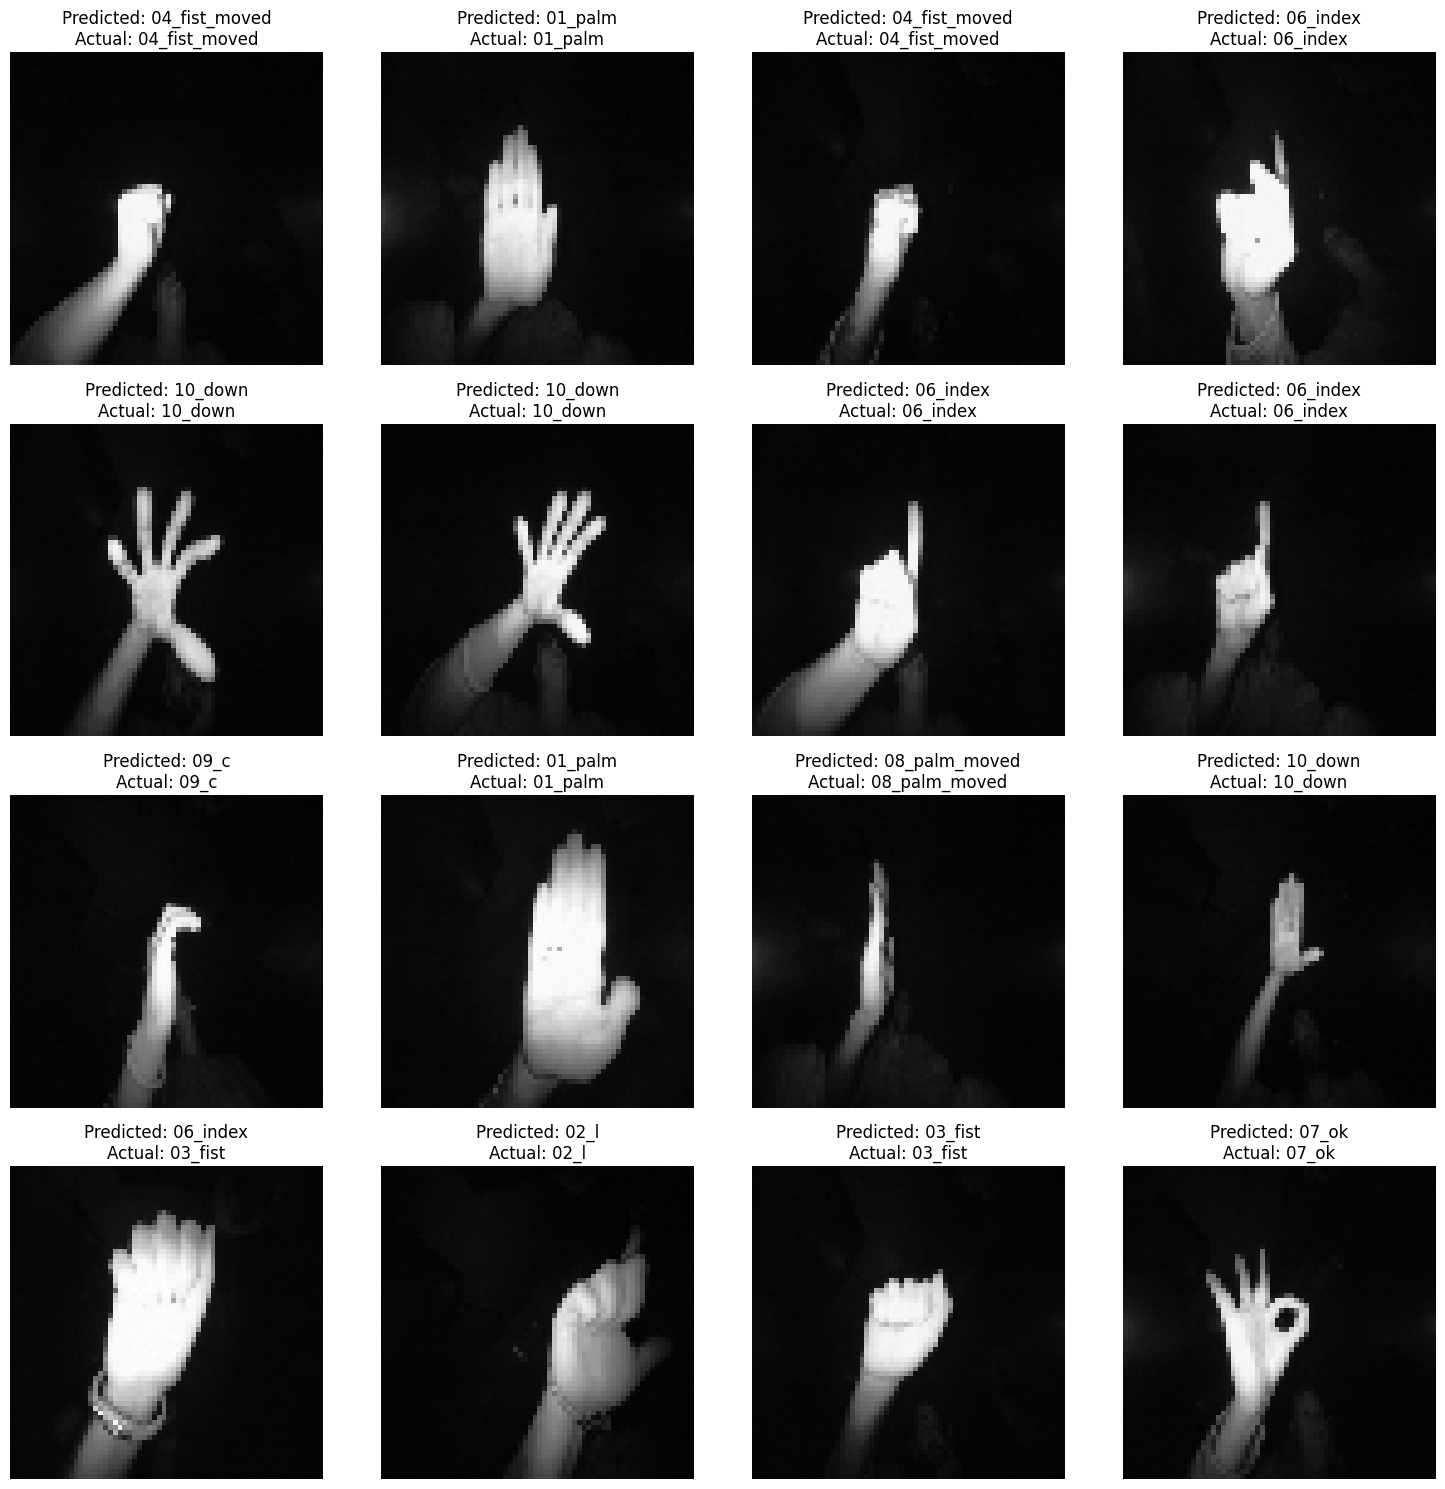

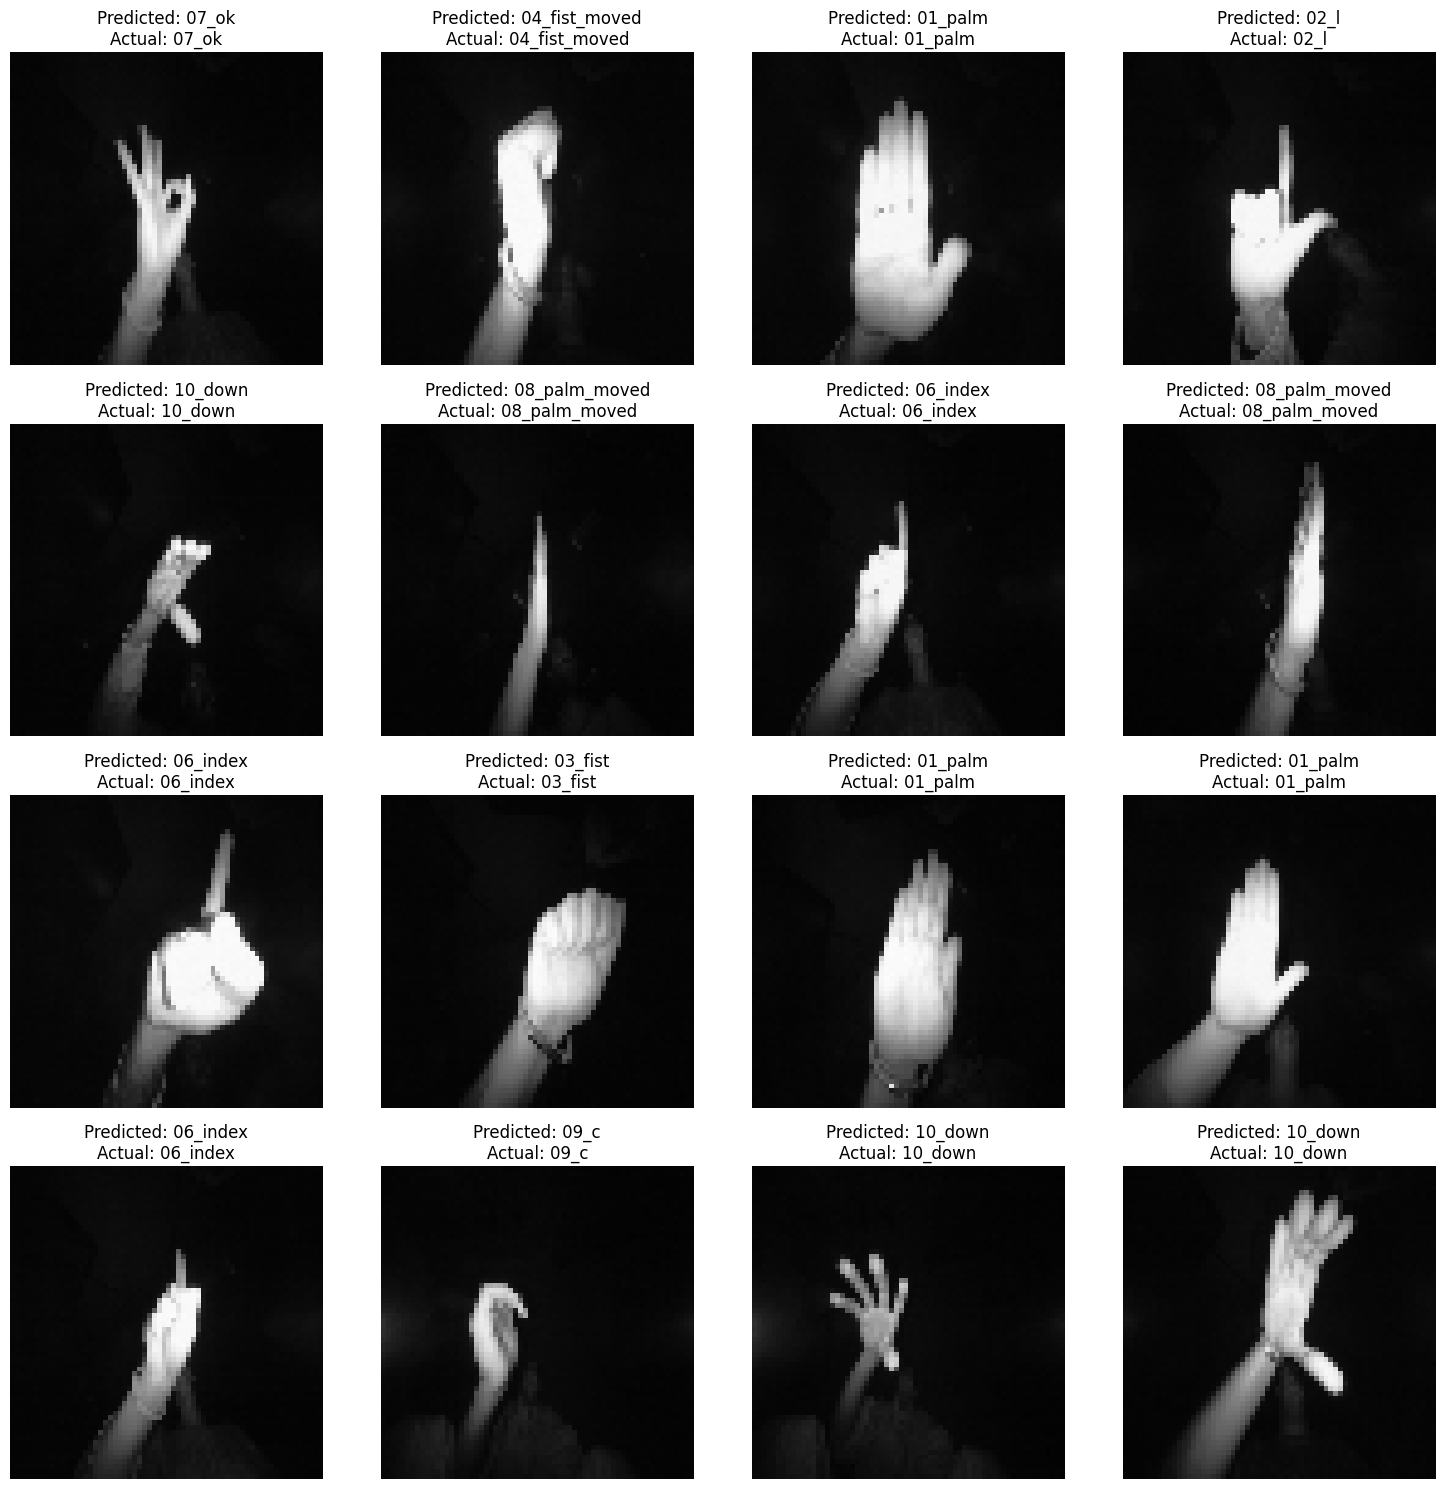

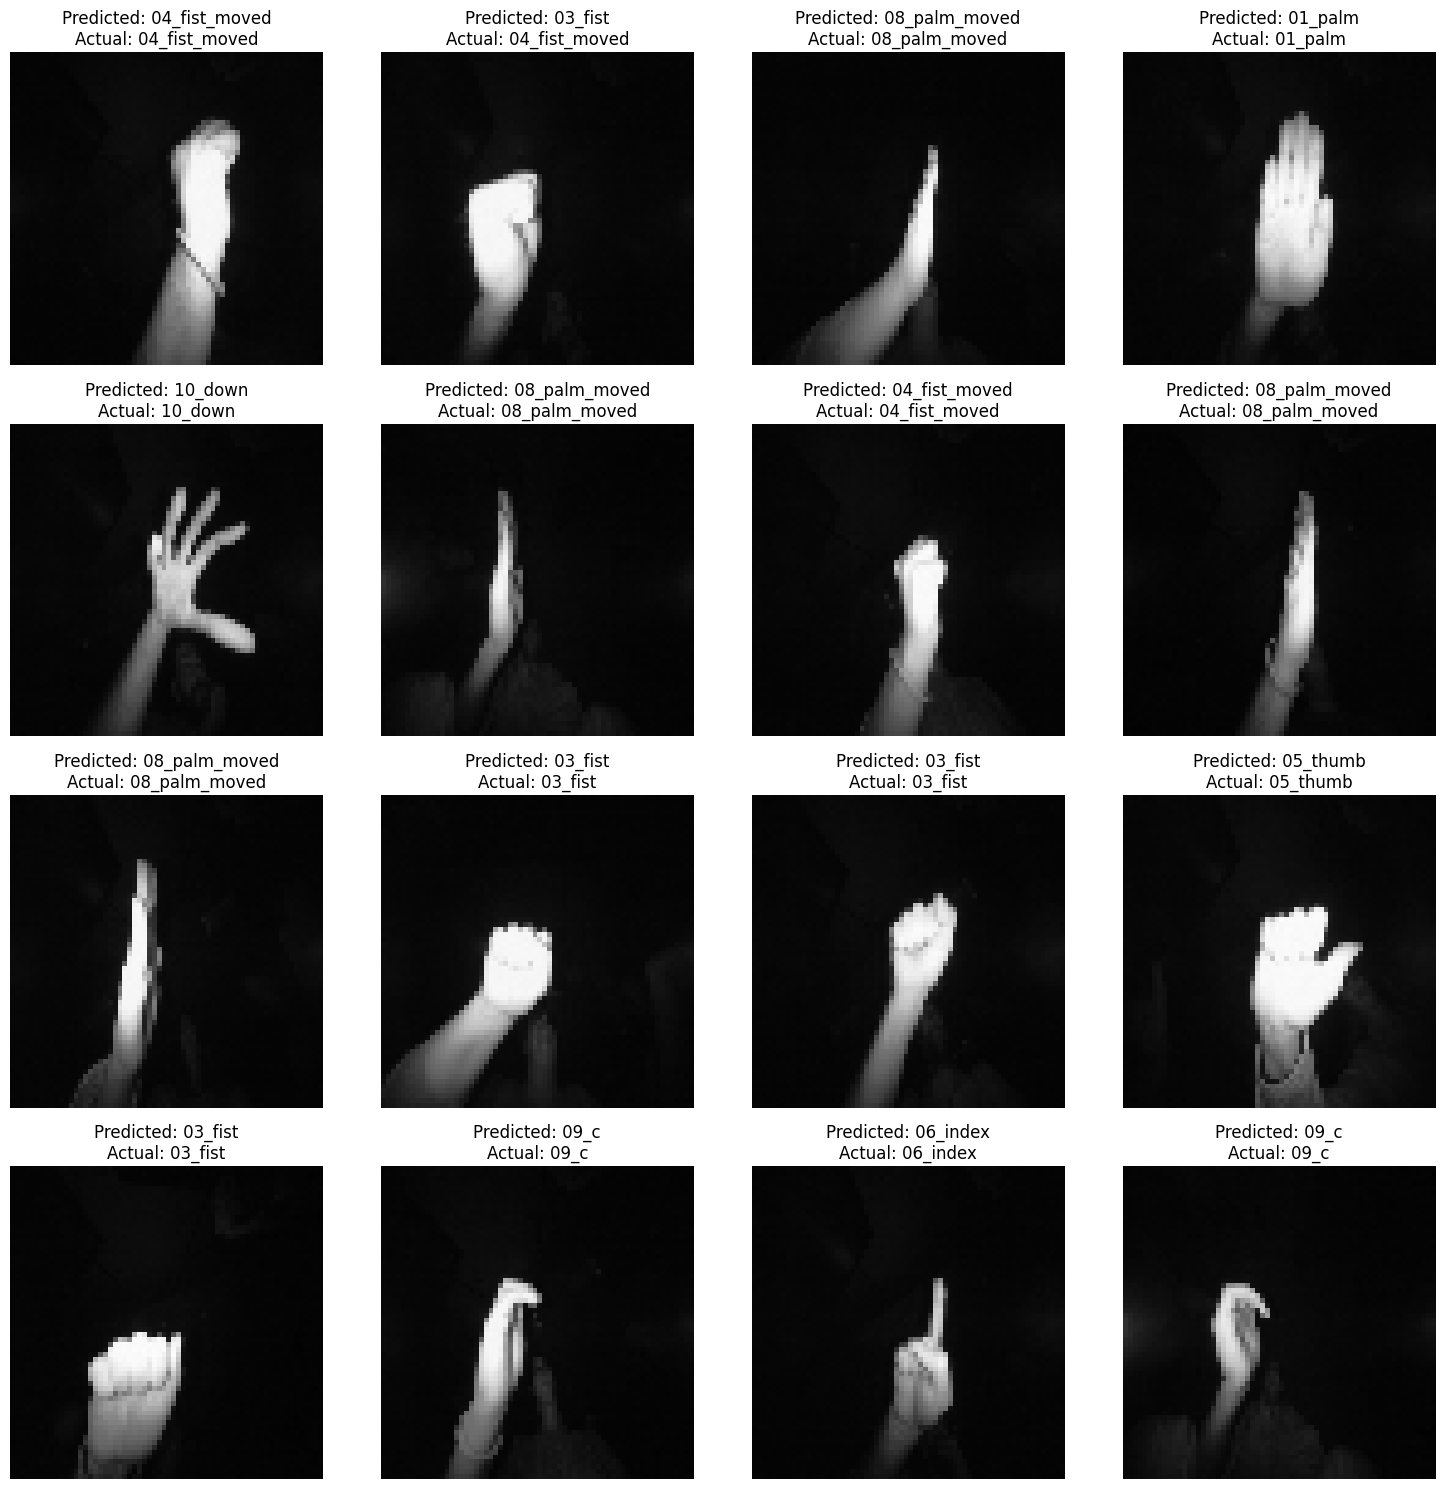

In [2]:
import matplotlib.pyplot as plt

#! Define a dictionary to map class indices to class names
class_index_to_name = {i: class_names[i] for i in range(len(class_names))}

predictions = model.predict(X_test)

#! Function to visualize images with their predicted and actual labels
def display_images_with_labels(X, y_true, y_pred, start_idx, num_images):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(4, 4, i + 1)
        plt.imshow(X[start_idx + i])
        predicted_label = class_index_to_name[np.argmax(y_pred[start_idx + i])]
        actual_label = class_index_to_name[np.argmax(y_true[start_idx + i])]
        plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

#! Display the batches of images 
display_images_with_labels(X_test, y_test, predictions, start_idx=0, num_images=16)
display_images_with_labels(X_test, y_test, predictions, start_idx=16, num_images=16) 
display_images_with_labels(X_test, y_test, predictions, start_idx=32, num_images=16)
